In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import shapiro
from scipy.stats import spearmanr
from scipy.stats import fligner
from scipy.stats import friedmanchisquare

In [159]:
df=pd.read_csv('Lligues europees UEFA.csv', sep=';',engine='python', encoding='latin1', index_col='Rk')

In [160]:
df

,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
Rk,,,,,,,,,,,,,,,,,,,,
1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Bordeaux,FRA,20,37,5,13,19,48,89,-41,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
95,Venezia,ITA,20,37,6,8,23,34,69,-35,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
96,Watford,ENG,19,37,6,5,26,33,75,-42,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster


Se coloca de index el ranking donde se encuentran los equipos. 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 1 to 98
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Squad            98 non-null     object 
 1   Country          98 non-null     object 
 2   LgRk             98 non-null     int64  
 3   MP               98 non-null     int64  
 4   W                98 non-null     int64  
 5   D                98 non-null     int64  
 6   L                98 non-null     int64  
 7   GF               98 non-null     int64  
 8   GA               98 non-null     int64  
 9   GD               98 non-null     int64  
 10  Pts              98 non-null     int64  
 11  Pts/G            98 non-null     float64
 12  xG               98 non-null     float64
 13  xGA              98 non-null     float64
 14  xGD              98 non-null     float64
 15  xGD/90           98 non-null     float64
 16  Last 5           98 non-null     object 
 17  Attendance       98 non

Se observa que todas las variables tienen el mismo número de atributos no nulos y el tipo de variable según la información que contiene tiene sentido. Por lo que no se realizará ningún cambio en estre aspecto.

In [19]:
df.describe

<bound method NDFrame.describe of               Squad Country  LgRk  MP   W   D   L  GF  GA  GD  Pts  Pts/G  \
Rk                                                                          
1   Manchester City     ENG     1  37  28   6   3  96  24  72   90   2.43   
2         Liverpool     ENG     2  36  26   8   2  89  24  65   86   2.39   
3       Real Madrid     ESP     1  37  26   7   4  80  31  49   85   2.30   
4     Bayern Munich     GER     1  34  24   5   5  97  37  60   77   2.26   
5         Paris S-G     FRA     1  37  25   8   4  85  36  49   83   2.24   
..              ...     ...   ...  ..  ..  ..  ..  ..  ..  ..  ...    ...   
94         Bordeaux     FRA    20  37   5  13  19  48  89 -41   28   0.76   
95          Venezia     ITA    20  37   6   8  23  34  69 -35   26   0.70   
96          Watford     ENG    19  37   6   5  26  33  75 -42   23   0.62   
97     Norwich City     ENG    20  37   5   7  25  23  79 -56   22   0.59   
98   Greuther Fürth     GER    18  34   3 

Aquí se describe la información más detallada del dataframe con el que vamos a trabajar. 

 - RK: Se trata del ranking o posición en la que se encuentran los equipos.
 - Squad: Nombre del equipo
 - Country: En tres letras el país donde pertenece el equipo.
 - LgRk: Clasifcación del equipo en su liga
 - MP: Matched played. Partidos jugados
 - W: Winned. Partidos ganados
 - D: Draw. Partidos empatados
 - L: Lost. Partidos perdidos.
 - GF: Goals Favour. Goles a favor.
 - GA: Goals against. Goles en contra
 - GD: Goals difference. Diferencia de goles 
 - Pts: Puntos en la liga
 
 - xG:Goles esperados 
 - xGA:Goles esperados en contra
 - xGD: Diferencia de goles esperados
 - xGD/90: Diferencia de goles esperados por cada partido (90minutos/partido)
 - Last 5: Rendimento en los últimos 5 partidos
 - Attendance: Asistencia media de espectadores por partido
 - Top Team Scorer: Nombre del máximo goleador del equipo
 - Goalkeeper: Nombre del portero titular

In [16]:
df.isna().sum()

Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

Se observa que no hay valores nulos

In [18]:
df.duplicated().sum()

0

Se observa que no hay valores duplicados


In [24]:
df.groupby('Country').count()

,Squad,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
Country,,,,,,,,,,,,,,,,,,,
ENG,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
ESP,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
FRA,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
GER,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
ITA,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20


Se detecta que todos los países tienen 20 equipos menos alemania que tendrà 18. Si se suman todos los datos se observa que tendrá menos datos en relación al resto de equipos.

In [64]:
df.groupby(['Country'])['MP'].sum().sort_values()


Country
GER    612
ENG    730
ITA    736
ESP    740
FRA    740
Name: MP, dtype: int64

Aquí también se detecta que el número de partidos jugados según el país no es el mismo. España y Francia tiene el máximo número de partidos jugados 740, mientras que el mínimo sería Alemania con 612. Además que Alemania contaba con un equipo menos.

In [58]:
df.groupby(['Squad', 'Country'])['W'].sum().sort_values()

Squad            Country
Greuther Fürth   GER         3
Genoa            ITA         4
Arminia          GER         5
Norwich City     ENG         5
Bordeaux         FRA         5
                            ..
Paris S-G        FRA        25
Milan            ITA        25
Liverpool        ENG        26
Real Madrid      ESP        26
Manchester City  ENG        28
Name: W, Length: 98, dtype: int64

In [39]:
df.describe().round(2)

,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00
mean,10.32,36.31,13.45,9.41,13.45,50.88,50.88,0.00,49.73,1.37,48.65,48.65,-0.01,0.00,24239.86
std,5.71,1.15,5.75,2.90,5.12,16.10,13.63,26.50,16.17,0.44,12.45,9.81,19.99,0.55,14874.17
min,1.00,34.00,3.00,3.00,2.00,23.00,24.00,-56.00,18.00,0.53,28.20,26.80,-40.40,-1.09,5870.00
25%,5.25,36.00,9.00,7.00,10.00,39.00,40.00,-17.75,37.00,1.00,39.10,41.30,-13.58,-0.36,12355.50
50%,10.00,37.00,13.00,9.00,13.00,47.00,50.00,-1.00,46.00,1.30,46.45,47.75,-1.10,-0.03,20491.00
75%,15.00,37.00,17.00,11.00,17.00,60.00,59.00,17.25,61.75,1.69,55.55,54.70,12.80,0.36,32382.00
max,20.00,37.00,28.00,16.00,26.00,97.00,89.00,72.00,90.00,2.43,88.10,73.30,59.30,1.60,73150.00


Se hace una descripción estadística de aquellas variables numéricas, donde se observa la mediana, la desviación estandar, los valores menores, mayores y los cuartiles.
MP: La desviación estandard de los partidos jugados es de 1,15, por lo que no es muy relevante la diferencia de partidos entre los diferentes equipos, algunos jugaron un min de 34 otros un max de 37.
W: En los partidos ganados la media en relación a los mín y los max ya es más pronunciada, teniendo equipos que han ganado 28 partidos pero otros únicamente 3.
La assistencia también varia mucho dependiendo del equipo y del país. Algunos equipos que provienen de lugares pequeños tiene sentido que tengan menor número de espectadores, en relación a otras ciudades o incluso equipos conocidos a nivel mundial.

In [62]:
df.groupby(['Squad', 'Country'])['Attendance'].sum().sort_values()

Squad           Country
Monaco          FRA         5870
Empoli          ITA         6320
Spezia          ITA         6380
Venezia         ITA         6705
Angers          FRA         7370
                           ...  
Barcelona       ESP        53933
Tottenham       ENG        56234
West Ham        ENG        58370
Arsenal         ENG        59636
Manchester Utd  ENG        73150
Name: Attendance, Length: 98, dtype: int64

Se agrupa la variable de equipo y país, para ver las diferencias de espectadores más concretamente. Aquí queda reflejado como el mayor número de espectadores va para ciudades grandes y conocidas mundialmente. Mientras que los menos son aquellos con menor popularidad o ciudadanía. 

In [63]:
df.corr().round(2)

,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
LgRk,1.00,0.08,-0.95,0.31,0.91,-0.84,0.83,-0.94,-0.96,-0.97,-0.80,0.78,-0.88,-0.88,-0.53
MP,0.08,1.00,0.02,0.25,0.06,-0.08,-0.05,-0.03,0.06,-0.04,-0.07,-0.04,-0.02,-0.02,0.03
W,-0.95,0.02,1.00,-0.44,-0.87,0.88,-0.80,0.94,0.99,0.99,0.85,-0.75,0.90,0.90,0.58
D,0.31,0.25,-0.44,1.00,-0.02,-0.36,0.07,-0.26,-0.29,-0.32,-0.33,0.07,-0.24,-0.24,-0.24
L,0.91,0.06,-0.87,-0.02,1.00,-0.80,0.84,-0.92,-0.93,-0.94,-0.79,0.80,-0.88,-0.88,-0.51
GF,-0.84,-0.08,0.88,-0.36,-0.80,1.00,-0.59,0.91,0.87,0.89,0.92,-0.60,0.87,0.87,0.48
GA,0.83,-0.05,-0.80,0.07,0.84,-0.59,1.00,-0.87,-0.84,-0.83,-0.59,0.86,-0.79,-0.79,-0.38
GD,-0.94,-0.03,0.94,-0.26,-0.92,0.91,-0.87,1.00,0.96,0.96,0.86,-0.81,0.93,0.93,0.49
Pts,-0.96,0.06,0.99,-0.29,-0.93,0.87,-0.84,0.96,1.00,0.99,0.85,-0.79,0.92,0.91,0.58
Pts/G,-0.97,-0.04,0.99,-0.32,-0.94,0.89,-0.83,0.96,0.99,1.00,0.86,-0.79,0.92,0.92,0.57


Se realiza una tabla de correlación entre las diferentes variables

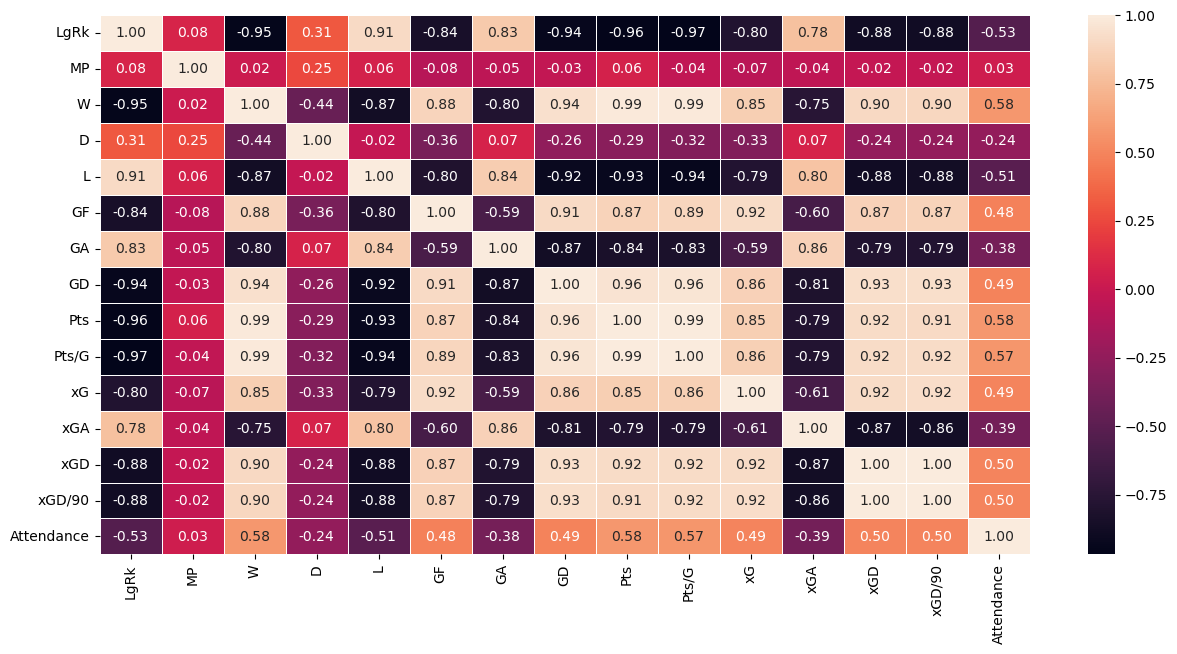

In [9]:
plt.figure(figsize=(15,7))

sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidth=.5)

Se hace una correlación para ver qué variables se correlacionan de manera positiva y cuales de manera negativa.
Las que están más cercanas con un 0.99 son W-Pts y Pts/G. Tiene sentido, cuantos más partidos ganados más puntos tendrá un equipo. Con un 0.96 GD-Pts y Pts/G, este punto es interesante, cuanta más diferencia de goles más puntos tendrá un equipo.

 # Exercici 1
 
- Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [164]:
#Test Shapiro-Wilk
from scipy.stats import shapiro

stat, p = shapiro(df['W'])
print('stat=%.3f, p=%.3f' % (stat, p))


if p > 0.05: 
 print('No hay evidencia para rechazar la hipótesis nula.')
else:
 print('Se rechaza la hipótesis nula.')

stat=0.965, p=0.011
Se rechaza la hipótesis nula.


Se selecciona el atributo W, partidos ganados para calcular si se rechaza la hipotesis nula.
Se utiliza el Test de Shapiro-Wilk para comprobar que los datos tienen una distribución gaussiana o normal.

HIPOTESIS NULA H0 = Los datos siguen una distribución normal.

HIPOTESIS ALTERNATIVA H1 = Los datos no siguen una distribución normal.

El test nos dice que los datos no siguen una distribución normal o gaussiana ya que rechaza la hipotesis nula. 


Text(0, 0.5, 'Densidad')

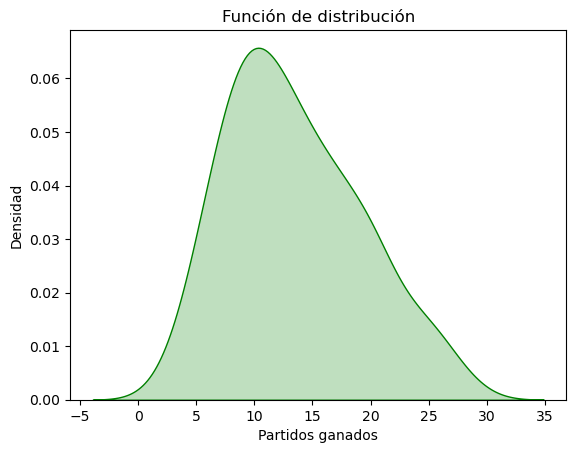

In [138]:
sns.kdeplot(df['W'], fill=True, color="g")
plt.title("Función de distribución")
plt.xlabel("Partidos ganados")
plt.ylabel("Densidad")

Aquí lo vemos gràficamente, como no tiene una clara forma de campana de gauss. 

# Exercici 2

- Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

En este caso, se seguirá con la variable de partidos ganados 'W', además de los puntos 'Pts'.
Para averiguar si existe una correlación entre ambas variables. Ganando más partidos, subirá también la variable de puntos.

In [156]:
#Test Shapiro-Wilk

stat, p = shapiro(df['Pts'])
print('stat=%.3f, p=%.3f' % (stat, p))


if p > 0.05: 
 print('No hay evidencia para rechazar la hipótesis nula')
else:
 print('Se rechaza la hipótesis nula')

stat=0.972, p=0.035
Se rechaza la hipótesis nula


Se realiza el test de shapiro, esta vez con la variable Puntos, se comprueba si siguen una distribución normal.
El resultado nos indica un p-value de 0.035, por lo que no seguiria una distribución normal o gaussiana.


Text(0, 0.5, 'Densidad')

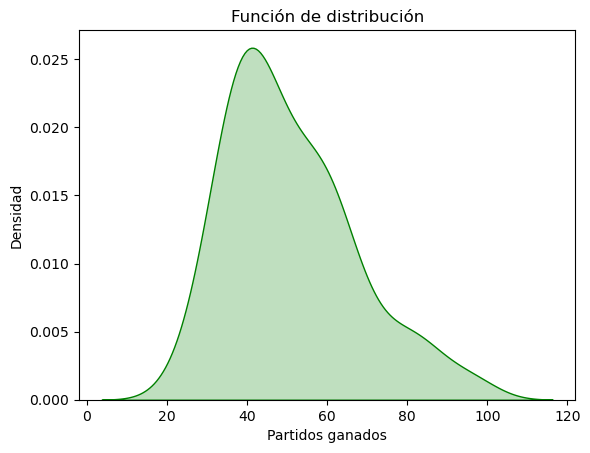

In [219]:
sns.kdeplot(df['GF'], fill=True, color="g")
plt.title("Función de distribución")
plt.xlabel("Partidos ganados")
plt.ylabel("Densidad")

Aquí se realiza una visualización de la densidad de la variable partidos ganados, mostrando su curva no gaussiana. Realizaremos test de ambas variables para comprobar su correlación.
Para comprobar la correlación entre ambas vamos a realizar el test de Spearman.

In [223]:
# Test de correlación de Spearman
correlation_coefficient, p_value = spearmanr(df['W'], df['Pts'])

print(f" Coeficiente Spearman: {correlation_coefficient:.3f}")
print(f" Valor p: {p:.3f}")


if p > 0.05:
    print("No hay evidencia para rechazar la hipótesis nula.")
    
else:
    print("Se rechazar la hipótesis nula.")


 Coeficiente Spearman: 0.984
 Valor p: 0.000
Se rechazar la hipótesis nula.


En este caso las variables de Partidos Ganados y Puntos no cumplen con los supuestos de distribución normal, por lo que se realizará un test de Spearman.


El test de Spearman concluye que existe una correlación significativa entre partidos ganados y puntos. Tiene sentido concluir que cuantos más partidos ganados, más puntos se obtendran. Ya que el coeficiente Spearman es muy alto, siendo muy cercano al 1 refleja una fuerte correlación. Mostrando una relación consistente entre ambas variables. Se rechaza la hipótesis nula. Hay evidencias significativas para afirmar que hay una correlación positiva entre las variables evaluadas.


Text(0, 0.5, 'Puntos')

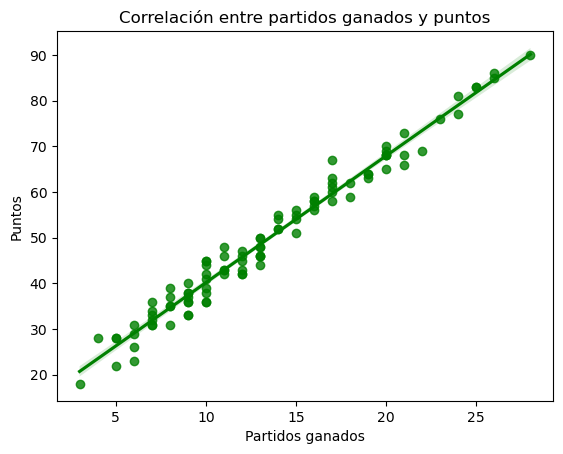

In [201]:
sns.regplot(x=df['W'], y=df['Pts'], color="g")
plt.title("Correlación entre partidos ganados y puntos")
plt.xlabel("Partidos ganados")
plt.ylabel("Puntos")


Se representa graficamente las dos variables, observando los puntos como todos aquellos valores de la muestra. Se observa como ambas variables siguen una misma dirección, por lo que la correlación será altamente positiva. 

# Exercici 3
- Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

In [168]:
#Test Shapiro-Wilk

stat, p = shapiro(df['GF'])
print('stat=%.3f, p=%.3f' % (stat, p))


if p > 0.05: 
 print('No hay evidencia para rechazar la hipótesis nula')
else:
 print('Se rechaza la hipótesis nula')

stat=0.943, p=0.000
Se rechaza la hipótesis nula


El test Shapiro en la variable de Goles a favor. Muestra que el atributo no seguiria una distribución normal o gaussiana.
Ahora pasaremos a realizar un test para las 3 variables con las que hemos ido trabajando hasta ahora para comprobar su correlación.

In [181]:
statistic, p_value = fligner(df['W'], df['Pts'], df['GF'])

print(f"Estadístico de Fligner-Killeen: {statistic:.3f}")
print(f"Valor p: {p_value:.3f}")

if p_value < 0.05:
    print("Se rechaza la hipótesis nula. Hay evidencia de diferencias significativas en las varianzas.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. Las varianzas son iguales.")


Estadístico de Fligner-Killeen: 58.045
Valor p: 0.000
Se rechaza la hipótesis nula. Hay evidencia de diferencias significativas en las varianzas.


En este caso se utiliza el test de Fligner-Killeen, ya que este test se usa para evaluar la homogeneidad de las varianzas entre dos o más grupos de datos. Siendo una alternativa no paramétrica al test de homogeneidad de varianzas de Levene. Como en este caso los datos no cumplen con los supuestos de normalidad se ha obtado por este test.

El test de Fligner-Killeen muestra el p-value a cero , lo que indica que hay evidencia significativa para rechazar la hipótesis nula de que las varianzas son iguales entre los grupos. En este caso las dispersiones de las varianzas de los datos no son homogéneas entre las tres variables. Se rechaza la hipotesis nula debido a que p-value es menor que 0.05.

In [184]:
statistic, p_value = friedmanchisquare(df['W'], df['Pts'], df['GF'])

print(f"Estadístico de Friedman: {statistic:.3f}")
print(f"Valor p: {p_value:.3f}")

if p_value < 0.05:
    print("Se rechaza la hipótesis nula. Hay evidencia de diferencias significativas en las medianas.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. Las medianas son iguales.")

Estadístico de Friedman: 149.318
Valor p: 0.000
Se rechaza la hipótesis nula. Hay evidencia de diferencias significativas en las medianas.


En este caso se evalúa también con el test de Friedman, el cual se utiliza para comparar medianas en tres o más atributos relacionados.

Se realiza una prueba con otro test para detectar si las medias entre las tres variables siguen una correlación. Pero el resultado es de un p-value extremadamente pequeño, llegando a mostrar solamente 0 cuando se reduce a trs decimales. Por lo tanto, indica que hay evidencia significativa para rechazar la hipótesis nula. Esto significa que hay al menos una diferencia significativa entre las medianas de los grupos. En conclusión, la magnitud del estadístico de Friedman también sugiere una diferencia sustancial entre las medianas.

Text(0.5, 1.0, 'Partidos Ganados, Puntos y Goles a Favor')

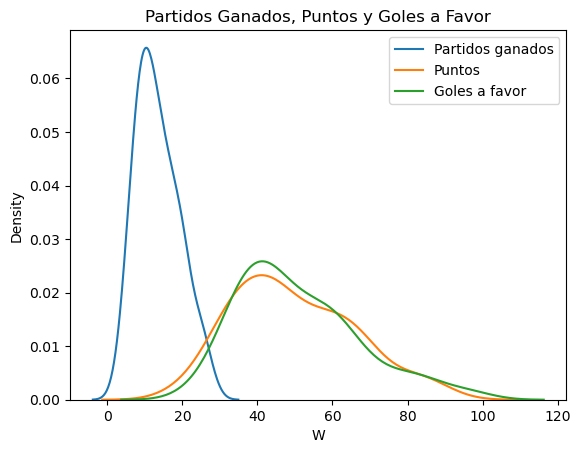

In [217]:
sns.kdeplot(df["W"], label="Partidos ganados")
sns.kdeplot(df["Pts"], label="Puntos")
sns.kdeplot(df["GF"], label="Goles a favor")
plt.legend()
plt.title("Partidos Ganados, Puntos y Goles a Favor")


Este último gráfico de densidad se evidencia como partidos ganados no sigue la misma tendencia que las variables de puntos y goles a favor, siguiendo una tendencia muy parecida. Esto corrobora lo que el test de Friedman y el de  Fligner-Killeen ya nos decían. Las variables entre si no siguen una varianza o media iguales. Una de las 3 variables no esta siguiendo una distribución homogenia. En este caso las variables de puntos y goles a favor tiene una distribución similar, mientras que partidos ganados tiene una distribución diferente.